11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/5
375/375 [==============================] - 14s 36ms/step - loss: 0.2535 - accuracy: 0.9250 - val_loss: 0.1065 - val_accuracy: 0.9708
Epoch 2/5
375/375 [==============================] - 14s 37ms/step - loss: 0.0838 - accuracy: 0.9757 - val_loss: 0.0687 - val_accuracy: 0.9805
Epoch 3/5
375/375 [==============================] - 14s 36ms/step - loss: 0.0541 - accuracy: 0.9838 - val_loss: 0.0551 - val_accuracy: 0.9847
Epoch 4/5
375/375 [==============================] - 14s 38ms/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9827
Test accuracy: 0.982699990272522


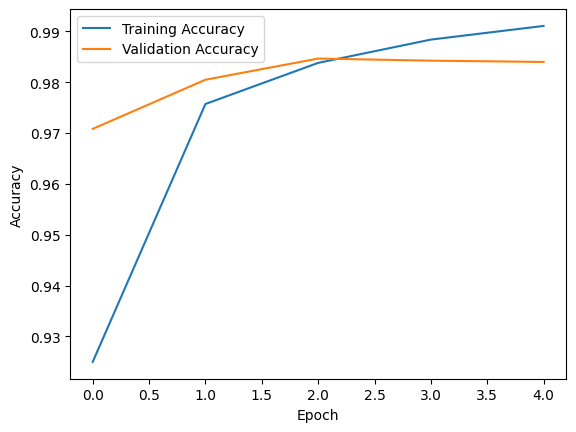

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data preprocessing
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
